In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("CarData.csv")
data = dataset.copy()
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.5+ MB


In [4]:
data.isnull().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
dtype: int64

In [5]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


In [6]:
data["mileage"] = (data["mileage"])*1.609

In [7]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,25317.615,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,58250.627,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,48183.114,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,41756.768,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,3214.782,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,119066.000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,141756.118,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,112630.000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,133070.736,Petrol,150.0,46.3,1.2


In [8]:
data.rename(columns={"mileage":"mileage (km)"},inplace=True)

In [9]:
data

,model,year,price,transmission,mileage (km),fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,25317.615,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,58250.627,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,48183.114,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,41756.768,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,3214.782,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,119066.000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,141756.118,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,112630.000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,133070.736,Petrol,150.0,46.3,1.2


In [10]:
data["kml"] = data["mpg"]/2.352
data.drop("mpg",axis=1,inplace=True)

In [11]:
data

,model,year,price,transmission,mileage (km),fuelType,tax,engineSize,kml
0,A1,2017,12500,Manual,25317.615,Petrol,150.0,1.4,23.554422
1,A6,2016,16500,Automatic,58250.627,Diesel,20.0,2.0,27.295918
2,A1,2016,11000,Manual,48183.114,Petrol,30.0,1.4,23.554422
3,A4,2017,16800,Automatic,41756.768,Diesel,145.0,2.0,28.613946
4,A3,2019,17300,Manual,3214.782,Petrol,145.0,1.0,21.088435
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,119066.000,Diesel,125.0,2.0,25.042517
108536,Fox,2008,1799,Manual,141756.118,Petrol,145.0,1.2,19.685374
108537,Fox,2009,1590,Manual,112630.000,Petrol,200.0,1.4,17.857143
108538,Fox,2006,1250,Manual,133070.736,Petrol,150.0,1.2,19.685374


In [12]:
(data["tax"].isnull().sum() /108540)*100

8.617099686751429

In [13]:
(data["kml"].isnull().sum() /108540)*100

8.617099686751429

In [14]:
clean_data = data.dropna(axis=0,how="any")
clean_data

,model,year,price,transmission,mileage (km),fuelType,tax,engineSize,kml
0,A1,2017,12500,Manual,25317.615,Petrol,150.0,1.4,23.554422
1,A6,2016,16500,Automatic,58250.627,Diesel,20.0,2.0,27.295918
2,A1,2016,11000,Manual,48183.114,Petrol,30.0,1.4,23.554422
3,A4,2017,16800,Automatic,41756.768,Diesel,145.0,2.0,28.613946
4,A3,2019,17300,Manual,3214.782,Petrol,145.0,1.0,21.088435
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,119066.000,Diesel,125.0,2.0,25.042517
108536,Fox,2008,1799,Manual,141756.118,Petrol,145.0,1.2,19.685374
108537,Fox,2009,1590,Manual,112630.000,Petrol,200.0,1.4,17.857143
108538,Fox,2006,1250,Manual,133070.736,Petrol,150.0,1.2,19.685374


In [15]:
data

,model,year,price,transmission,mileage (km),fuelType,tax,engineSize,kml
0,A1,2017,12500,Manual,25317.615,Petrol,150.0,1.4,23.554422
1,A6,2016,16500,Automatic,58250.627,Diesel,20.0,2.0,27.295918
2,A1,2016,11000,Manual,48183.114,Petrol,30.0,1.4,23.554422
3,A4,2017,16800,Automatic,41756.768,Diesel,145.0,2.0,28.613946
4,A3,2019,17300,Manual,3214.782,Petrol,145.0,1.0,21.088435
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,119066.000,Diesel,125.0,2.0,25.042517
108536,Fox,2008,1799,Manual,141756.118,Petrol,145.0,1.2,19.685374
108537,Fox,2009,1590,Manual,112630.000,Petrol,200.0,1.4,17.857143
108538,Fox,2006,1250,Manual,133070.736,Petrol,150.0,1.2,19.685374


In [16]:
data["fuelType"].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [17]:
pd.Categorical(data["fuelType"])

['Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', ..., 'Diesel', 'Petrol', 'Petrol', 'Petrol', 'Petrol']
Length: 108540
Categories (5, object): ['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol']

In [18]:
fuelType = ['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol']

In [19]:
data["fuelType"] = pd.Categorical(data["fuelType"]).codes

In [20]:
data

,model,year,price,transmission,mileage (km),fuelType,tax,engineSize,kml
0,A1,2017,12500,Manual,25317.615,4,150.0,1.4,23.554422
1,A6,2016,16500,Automatic,58250.627,0,20.0,2.0,27.295918
2,A1,2016,11000,Manual,48183.114,4,30.0,1.4,23.554422
3,A4,2017,16800,Automatic,41756.768,0,145.0,2.0,28.613946
4,A3,2019,17300,Manual,3214.782,4,145.0,1.0,21.088435
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,119066.000,0,125.0,2.0,25.042517
108536,Fox,2008,1799,Manual,141756.118,4,145.0,1.2,19.685374
108537,Fox,2009,1590,Manual,112630.000,4,200.0,1.4,17.857143
108538,Fox,2006,1250,Manual,133070.736,4,150.0,1.2,19.685374


In [21]:
data.corr()["tax"]

year            0.195693
price           0.307648
mileage (km)   -0.220761
fuelType        0.102234
tax             1.000000
engineSize      0.278411
kml            -0.451451
Name: tax, dtype: float64

In [22]:
data.corr()["kml"]

year           -0.132791
price          -0.296429
mileage (km)    0.185657
fuelType       -0.231552
tax            -0.451451
engineSize     -0.248210
kml             1.000000
Name: kml, dtype: float64

In [23]:
data["tax"][(data["fuelType"] == "Diesel")&(data["tax"].isnull())]

Series([], Name: tax, dtype: float64)

In [24]:
tax_diesel_mean = data["tax"][data["fuelType"] == 0].mean()
tax_diesel_mean

114.53454847537138

In [25]:
for i in range(5):
    #print(i)
    tax_mean = data["tax"][data["fuelType"] == i].mean()
    data["tax"][(data["fuelType"] == i)&(data["tax"].isnull())] = tax_mean

In [26]:
data["tax"].isnull().sum()

0

In [27]:
for i in range(5):
    #print(i)
    kml_mean = data["kml"][data["fuelType"] == i].mean()
    data["kml"][(data["fuelType"] == i)&(data["kml"].isnull())] = kml_mean

In [28]:
data["kml"].isnull().sum()

0

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage (km)  108540 non-null  float64
 5   fuelType      108540 non-null  int8   
 6   tax           108540 non-null  float64
 7   engineSize    108540 non-null  float64
 8   kml           108540 non-null  float64
dtypes: float64(4), int64(2), int8(1), object(2)
memory usage: 6.7+ MB


In [30]:
model_type = pd.Categorical(data["model"]).categories
model_type

Index([' 1 Series', ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ' 6 Series', ' 7 Series', ' 8 Series', ' A Class', ' A1',
       ...
       ' Z3', ' Z4', ' Zafira', ' Zafira Tourer', ' i3', ' i8', '180', '200',
       '220', '230'],
      dtype='object', length=195)

In [31]:
data["model"] = pd.Categorical(data["model"]).codes

In [32]:
data

,model,year,price,transmission,mileage (km),fuelType,tax,engineSize,kml
0,9,2017,12500,Manual,25317.615,4,150.0,1.4,23.554422
1,14,2016,16500,Automatic,58250.627,0,20.0,2.0,27.295918
2,9,2016,11000,Manual,48183.114,4,30.0,1.4,23.554422
3,12,2017,16800,Automatic,41756.768,0,145.0,2.0,28.613946
4,11,2019,17300,Manual,3214.782,4,145.0,1.0,21.088435
...,...,...,...,...,...,...,...,...,...
108535,57,2012,5990,Manual,119066.000,0,125.0,2.0,25.042517
108536,62,2008,1799,Manual,141756.118,4,145.0,1.2,19.685374
108537,62,2009,1590,Manual,112630.000,4,200.0,1.4,17.857143
108538,62,2006,1250,Manual,133070.736,4,150.0,1.2,19.685374


In [33]:
transmission_type = data["transmission"].unique()
transmission_type

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [34]:
data["transmission"] = pd.Categorical(data["transmission"]).codes

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [36]:
x = data.drop("model",axis=1)
y = data["model"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 100)

In [38]:
clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state = 100,max_depth = 13)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=100)

In [39]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([ 61,  61, 187, ...,  11, 153,  59], dtype=int16)

In [40]:
accuracy_score(y_test,y_pred)

0.751888704625023

In [41]:
accuracy_score(y_train,clf_entropy.predict(X_train))

0.8137882018479033

In [44]:
pd.DataFrame(y_test.values,y_pred)

,0
61,61
61,61
187,187
55,55
25,25
...,...
75,61
12,12
11,11
153,153


In [45]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage (km)', 'fuelType',
       'tax', 'engineSize', 'kml'],
      dtype='object')

In [46]:
clf_entropy.predict([[2015,10000,1,60000,0,130,1.8,17]])


array([29], dtype=int16)

In [47]:
model_type[29]

' B Class'

In [48]:
data[(data["year"] == 2015) & (data['transmission'] == 1) & (data['fuelType'] == 0) &(data['engineSize'] > 1.6) & (data['model'] == 29)]

,model,year,price,transmission,mileage (km),fuelType,tax,engineSize,kml
55190,29,2015,11640,1,54818.630,0,30.0,2.1,27.933673
59426,29,2015,13490,1,31373.891,0,30.0,2.1,26.700680
64702,29,2015,10000,1,61946.500,0,30.0,2.1,27.933673
64906,29,2015,11499,1,21620.133,0,30.0,2.1,27.295918


In [49]:
data["kml"].max()

200.1700680272109

In [50]:
data.iloc[29]

model              14.00000
year             2015.00000
price           14000.00000
transmission        1.00000
mileage (km)    98432.18400
fuelType            0.00000
tax                30.00000
engineSize          2.00000
kml                26.70068
Name: 29, dtype: float64

In [51]:
model_type

Index([' 1 Series', ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ' 6 Series', ' 7 Series', ' 8 Series', ' A Class', ' A1',
       ...
       ' Z3', ' Z4', ' Zafira', ' Zafira Tourer', ' i3', ' i8', '180', '200',
       '220', '230'],
      dtype='object', length=195)

In [52]:
pd.Categorical(data["model"]).categories

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            185, 186, 187, 188, 189, 190, 191, 192, 193, 194],
           dtype='int64', length=195)

In [53]:
### Visualization

<AxesSubplot:xlabel='transmission', ylabel='price'>

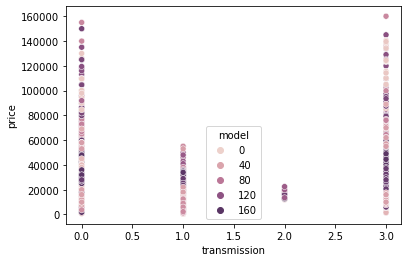

In [54]:
sns.scatterplot(data["transmission"],data["price"],hue = data["model"])